### 【BeautifulSoup 패키지】
- 뷰티플 수프는 HTML과 XML 문서를 파싱하기위한 파이썬 패키지입니다. 웹 스크래핑에 유용한 HTML에서 데이터를 추출하는 데 사용할 수있는 구문 분석 된 페이지에 대한 구문 분석 트리를 생성합니다.
- from bs4 import BeautifulSoup     로 모듈을 실행합니다.  모듈 에러시 모듈을 !pip install beautifulsoup4 로 설치합니다.
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [1]:
test_html = """<html> \
            <body> \
                <h1 id='title'>[1]크롤링이란?</h1> \
                <p class='cssstyle'>웹페이지에서 필요한 데이터를 추출하는 것</p> \
                <p id='body' align='center'>파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> \
            </body> \
        </html>"
"""

In [2]:
#########################
## 미션
## test_html을 bs4모듈에서 불러오고 print합니다..(파싱)
from bs4 import BeautifulSoup
soup = BeautifulSoup(test_html, "html.parser")
soup

<html> <body> <h1 id="title">[1]크롤링이란?</h1> <p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p> <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> </body> </html>"

In [3]:
#########################
## 미션
## 처음나오는 p 태그를 검색하고 그 태그의 텍스트를 표시합니다.

tagFind=soup.find('p')
re=tagFind.string
re

'웹페이지에서 필요한 데이터를 추출하는 것'

### 【html에서 추출한 데이터에서 형태소분석을 하였습니다.】

In [4]:
#########################
## 미션
## <h1> , <P> 태그의 내용을 검색하는 for를 작성합니다.
## html_h1 과 html_p 변수에  각 내용을 저장합니다.
html_h1=0 ; html_p=0
datalist=['h1','p']

for i in datalist:
    tagFind=soup.find(i)  # 맨위에 나와 있는 첫번째 자료만 찾기
    re=tagFind.string
    if i=='h1':
        html_h1=re
    elif i=='p':
        html_p=re

print("html_h1 의 변수 내용은==>",html_h1)
print("html_p 의 변수 내용은==>",html_p)



html_h1 의 변수 내용은==> [1]크롤링이란?
html_p 의 변수 내용은==> 웹페이지에서 필요한 데이터를 추출하는 것


In [5]:
!pip install konlpy

In [6]:
#########################
## ## 저장된 html_h1과 html_P 태그를 형태소 분석을 실시하면 자동 list가 됩니다.
##
### okt의 명사단위로 나누세요

from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
print(okt.morphs(html_h1))
print(okt.morphs(html_p))

print('\n---------명사 -----------')
print(okt.nouns(html_h1))
print(okt.nouns(html_p))

print('\n--------품사 태깅 -----------')
print(okt.pos(html_h1))
print(okt.pos(html_p))

print('\n--------품사 태깅중 Noun만 추출합니다. -----------')
pos_=okt.pos(html_p) ; noun_=[]

for i in pos_:
    if i[1]=='Noun':
        noun_.append(i)
print(noun_)


print('\n\n--(참고: 1109일 토요일 자료) 위의 for 구문을 아래와 같이 한줄로 작성가능합니다. ---')

ttt=[i for i in pos_ if i[1]=='Noun']
print(ttt)


--------- 형태소 분석 -----------
['[', '1', ']', '크', '롤링', '이란', '?']
['웹페이지', '에서', '필요한', '데이터', '를', '추출', '하는', '것']

---------명사 -----------
['롤링']
['웹페이지', '데이터', '추출', '것']

--------품사 태깅 -----------
[('[', 'Punctuation'), ('1', 'Number'), (']', 'Punctuation'), ('크', 'Verb'), ('롤링', 'Noun'), ('이란', 'Josa'), ('?', 'Punctuation')]
[('웹페이지', 'Noun'), ('에서', 'Josa'), ('필요한', 'Adjective'), ('데이터', 'Noun'), ('를', 'Josa'), ('추출', 'Noun'), ('하는', 'Verb'), ('것', 'Noun')]

--------품사 태깅중 Noun만 추출합니다. -----------
[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]


--(참고: 1109일 토요일 자료) 위의 for 구문을 아래와 같이 한줄로 작성가능합니다. ---
[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]


In [7]:
ttt

[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]

In [8]:
import pandas as pd

word=[i[0] for i in pos_]
mor=[i[1] for i in pos_]

dict_data={'word':word,'품사':mor}
db=pd.DataFrame(dict_data)
db

,word,품사
0,웹페이지,Noun
1,에서,Josa
2,필요한,Adjective
3,데이터,Noun
4,를,Josa
5,추출,Noun
6,하는,Verb
7,것,Noun


In [9]:
#########################
## 미션
## p 태그의 모든 텍스트를 출력합니다.
### 모든 텍스트를 갖고옴
### 태그를 제외하고 텍스트만 출력하는 명령어는 get_text
## get_text는 문자열만 출력가능, 리스트 통으로 출력 불가능
태그포함=soup.find_all('p')
print(태그포함,'\n\n')

for i in 태그포함:
    print(i.get_text())

#위의 구문을 한줄로 변형해보세요.
ttt=[i for i in pos_ if i[1]=='Noun']

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>, <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p>] 


웹페이지에서 필요한 데이터를 추출하는 것
파이썬을 중심으로 다양한 웹크롤링 기술 발달


In [10]:
#########################
## 미션
## p 태그중  class='cssstyle' 인 내용만 출력합니다.

soup.find_all('p',attrs={'class':'cssstyle'})

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>]

### [미술관옆 동물원 시나리오.htm] 분석 워드클라우드


In [11]:
from bs4 import BeautifulSoup

with open("미술관옆동물원(시나리오샘플국립국어원).html",encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')
soup


<!DOCTYPE tei.2 SYSTEM "c:\sgml\dtd\tei2.dtd" [
	<!ENTITY % TEI.corpus "INCLUDE">

<!--ENTITY % TEI.extensions.ent SYSTEM "sejong1.ent"-->
<!--ENTITY % TEI.extensions.dtd SYSTEM "sejong1.dtd"-->
]&gt;

<tei.2>
<teiheader>
<filedesc>
<titlestmt>
<title>미술관 옆 동물원 (시나리오), 전자파일</title>
<author>이정향</author>
<sponsor>대한민국 문화관광부</sponsor>
<respstmt>
<resp>전자/표준화</resp>
<name>연세대학교 언어정보개발연구원</name>
</respstmt>
</titlestmt>
<extent>11638 어절</extent>
<publicationstmt>
<distributor>국립국어연구원</distributor>
<idno>2CJ00052.HWP</idno>
<availability>배포 불가</availability>
</publicationstmt>
<notesstmt>
<note>감독 이정향제작년도 1998년상영시간 108분장르 멜로</note>
</notesstmt>
<sourcedesc>
<bibl>
<author>이정향</author>
<title>미술관 옆 동물원</title>
</bibl>
</sourcedesc>
</filedesc>
<encodingdesc>
<projectdesc>21세기 세종계획 2차연도 말뭉치 구축</projectdesc>
<samplingdecl>원본 데이터를 PC 파일로 변환</samplingdecl>
<editorialdecl>21세기 세종계획 말뭉치 문헌 입력 지침에 따름</editorialdecl>
</encodingdesc>
<profiledesc>
<creation>
<date>1998</date>
</creation>
<langusage>
<

In [12]:
castList=[x.text for x in soup.find_all('castitem')]
castList

['이춘희',
 '한철수',
 '현실의 인공 ― 상상의 인공',
 '현실의 다혜 ― 상상의 다혜',
 '집주인',
 '국회의원',
 '젊은 보좌관',
 '신랑, 신부 1쌍',
 '신혼부부',
 '중년부부',
 '노년부부',
 '중년부부의 아이들']

In [13]:
## 등장인물 출력
castitem=soup.find_all('castitem')
castitem_=[i.get_text() for i in castitem]
print(castitem_)

## castitem_=[i.get_text() for i in castitem] 은
## 아래의 for 구문과 같음
# castitem_=[]
# for i in castitem:
#     castitem_.append(i)

print('등장인물은 총 몇명?' , len(castitem_))


['이춘희', '한철수', '현실의 인공 ― 상상의 인공', '현실의 다혜 ― 상상의 다혜', '집주인', '국회의원', '젊은 보좌관', '신랑, 신부 1쌍', '신혼부부', '중년부부', '노년부부', '중년부부의 아이들']
등장인물은 총 몇명? 12


In [14]:
import matplotlib.pyplot as plt
from collections import Counter
speak=soup.find_all('speaker')
speakList=[i.get_text().split(':')[0] for i in speak]
Ccount=speakList.count('춘희')

print(f'춘희는 {Ccount} 번 나왔습니다')

춘희는 304 번 나왔습니다


In [15]:
character_counts = Counter(speakList)

character_counts

Counter({'신부': 1,
         '신랑': 1,
         '춘희소리': 29,
         '의원': 4,
         '보좌관': 3,
         '춘희': 304,
         '젊은 보좌관': 2,
         '아줌마': 12,
         '철수': 312,
         '중년부인소리': 1,
         '부인소리': 2,
         '여자소리': 1,
         '소리': 11,
         '다혜': 52,
         '둘': 2,
         '철수소리': 34,
         '인공': 34,
         '다혜독백': 3,
         '남편': 3,
         '아내': 3,
         '할머니': 2,
         '할아버지 소리': 1,
         '할아버지': 2,
         '할머니소리': 1,
         '유다혜소리': 1,
         '응답기': 2,
         '춘희독백': 1})

In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

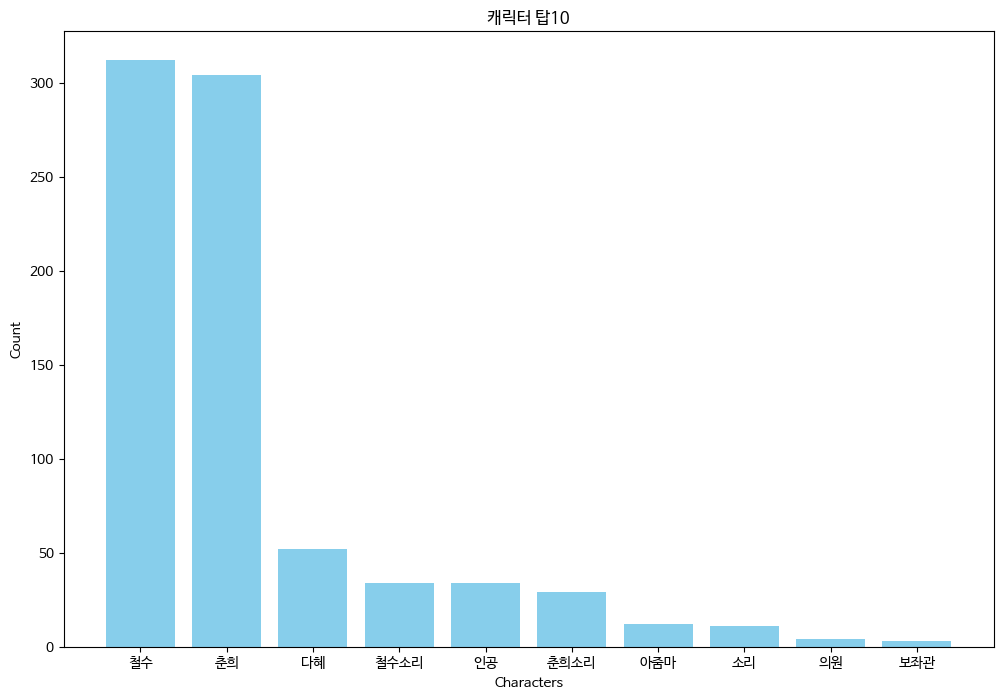

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

top_characters = sorted(character_counts.items(), key=lambda x: x[1], reverse=True)[:10]
characters, counts = zip(*top_characters)

# Visualize the data
plt.figure(figsize=(12, 8))
plt.bar(characters, counts, color='skyblue')
plt.title('캐릭터 탑10')
plt.xlabel('Characters')
plt.ylabel('Count')
plt.show()

In [28]:
ciga=soup.find_all('scnum')
ciga



[<scnum>S 1 결혼식장</scnum>,
 <scnum>S 2 결혼식장 복도</scnum>,
 <scnum>S 인서트</scnum>,
 <scnum>S 3 결혼식장 복도</scnum>,
 <scnum>S 인서트</scnum>,
 <scnum>S 4 결혼식장 복도</scnum>,
 <scnum>S 5 춘희네 동네 (낮)</scnum>,
 <scnum>S 6 춘희 방</scnum>,
 <scnum>S 7 복도</scnum>,
 <scnum>S 8 춘희집 연립주택 앞</scnum>,
 <scnum>S 9 춘희 방</scnum>,
 <scnum>S 10 복도</scnum>,
 <scnum>S 11 춘희집 앞 (밤)</scnum>,
 <scnum>S 12 춘희의 상상 (아침)</scnum>,
 <scnum>S 13 춘희방</scnum>,
 <scnum>S 14 춘희 방 (다음날 해질녘)</scnum>,
 <scnum>S 15 춘희방 (다음날)</scnum>,
 <scnum>S 16 자동차</scnum>,
 <scnum>S 17 노천 카페</scnum>,
 <scnum>S 18 다리 위</scnum>,
 <scnum>S 19 달리는 차</scnum>,
 <scnum>S0 20 주차장</scnum>,
 <scnum>S 21 미술관과 동물원 사이 호숫가</scnum>,
 <scnum>S 22 철수 차 (저녁)</scnum>,
 <scnum>S 23 춘희방 (저녁)</scnum>,
 <scnum>S 24 현관앞 복도</scnum>,
 <scnum>S 25 춘희방</scnum>,
 <scnum>S 26 춘희 방 외경</scnum>,
 <scnum>S 27 춘희네 앞 (저녁)</scnum>,
 <scnum>S 28 춘희방 (밤)</scnum>,
 <scnum>S 29 미술관</scnum>,
 <scnum>S 30 동물원</scnum>,
 <scnum>S 31 동물원 앞길</scnum>,
 <scnum>S 32 다혜네</scnum>,
 <scnum>S 33 인공집</scnum

In [31]:
#### 코랩 드라이버 마운트는 코랩 폴더를 동기화하는 작업
# 좌측에 있는 드라이브 마운트 아이콘 클릭하면
# 마운트 하는 코드가 나오거나(실행하면 됨)
# 알아서 마운트함

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
cd /content/drive/MyDrive/Colab Notebooks/크롤링자료

/content/drive/MyDrive/Colab Notebooks/크롤링자료


In [33]:
ls

'1_html_웹자료 가져오기_BS모듈 기초.ipynb'
'2_크롤링기초복습 및 미술관옆 동물원 html 시나리오.ipynb'
 crawling.ipynb
'미술관옆동물원(시나리오샘플국립국어원).html'


In [18]:
# 신넘버 제목만 출력하고 몇개의 신이 있는 지 출력
scnum=soup.find_all('scnum')
scnum_=[i.get_text() for i in scnum]
print('\n 몇신?' , len(scnum_))
#scnum_

# 명사단위로 나누어서 워드클라우드 하려함
from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
#scnumStr=''
#for li in scnum_:
#    scnumStr=scnumStr+li
#
#scnumStr
#okt.nouns(scnumStr)

명사추출=okt.nouns(scStr)

scStr=' '.join(명사추출)  #for와 같음. join구문에서는 변수 초기화안해도됨


from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

wc = WordCloud('c:/python_data/malgun.ttf',
                background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(scStr)      # str자료만 가능, list자료는 안됨

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()


 몇신? 103

--------- 형태소 분석 -----------


NameError: name 'scStr' is not defined

In [ ]:
# 파이썬이 제공하는 count 함수 를 사용할때는
# 자료가 리스트구조여야함.

from collections import Counter
#다시리스트로=명사추출.split(' ')
Counter(명사추출).most_common(10)  #상위10개

## Counter를 직접 만들수도 있습니다.
- #검색하는명사=명사추출

# 단어중복 없애고 단일값만 가져가는 방법
-  단어유일기억리스트=[] ; 있음=0
- for i in 명사추출:
-     for j in 단어유일기억리스트:
-        if i==j:
-            있음=있음+1
-    if 있음=0:
-        단어유일기억리스트.append(i)
        

- cnt=0
- for i in 명사추출:
-    for 명사리스트 in 명사추출:
-        if i==명사리스트:
-            cnt=cnt+1
-    print(i + "---->"+ str(cnt))

## stage 태그의 내용만 찾아서
## 워드클라우드 작업 실행해보세요

In [38]:
import os
import sys
import urllib.request
client_id = ""
client_secret = ""
encText = urllib.parse.quote("병원노쇼")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
print(url)
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    text=response_body.decode('utf-8')
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

https://openapi.naver.com/v1/search/blog?query=%EB%B3%91%EC%9B%90%EB%85%B8%EC%87%BC
{
	"lastBuildDate":"Wed, 17 Jan 2024 12:04:10 +0900",
	"total":13595,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"(<b>병원<\/b>채용) 직원 <b>노쇼<\/b>에 너무 마음 아퍼하지 마세요",
			"link":"https:\/\/blog.naver.com\/araceo\/223241751532",
			"description":"출근하기 전에 <b>노쇼<\/b>를 한 것은 그래도 괜찮다. 출근 전에 다른 <b>병원<\/b> 면접을 보는 것은 일반사이고 면접을 보고 더 괜찮은 <b>병원<\/b>이 나오면 통보를 하고 안 나올 수 있기 때문이다. 그마나 통보를 해 주면 새로운... ",
			"bloggername":"창조 병원을 위한 생각 & 전략 With 윤성민",
			"bloggerlink":"blog.naver.com\/araceo",
			"postdate":"20231020"
		},
		{
			"title":"전주도수치료 - STOP! <b>병원 노쇼<\/b>(예약부도)",
			"link":"https:\/\/blog.naver.com\/dosu9175\/223070142422",
			"description":"오늘은 조금 조심스럽지만, 병원과 환자의 신뢰를 깨트리는 노쇼에 관한 이야기를 해볼까 합니다. 사진... #전주도수치료 #전주정형외과 #전주신경외과 #<b>병원노쇼<\/b> #노쇼근절 #전주키네틱체인의원",
			"bloggername":"전주도수치료 키네틱체인의원",
			"bloggerlink":"blog.naver.com\/dosu9175",
			"postdate":"20230410"
		},
		{
			"title":"안민석, 국립대<b>병원 노쇼<\/b> 여전히 심

In [40]:
type(response_body)

bytes

In [45]:
import json
dList = json.loads(response_body)
dList

{'lastBuildDate': 'Wed, 17 Jan 2024 12:04:10 +0900',
 'total': 13595,
 'start': 1,
 'display': 10,
 'items': [{'title': '(<b>병원</b>채용) 직원 <b>노쇼</b>에 너무 마음 아퍼하지 마세요',
   'link': 'https://blog.naver.com/araceo/223241751532',
   'description': '출근하기 전에 <b>노쇼</b>를 한 것은 그래도 괜찮다. 출근 전에 다른 <b>병원</b> 면접을 보는 것은 일반사이고 면접을 보고 더 괜찮은 <b>병원</b>이 나오면 통보를 하고 안 나올 수 있기 때문이다. 그마나 통보를 해 주면 새로운... ',
   'bloggername': '창조 병원을 위한 생각 & 전략 With 윤성민',
   'bloggerlink': 'blog.naver.com/araceo',
   'postdate': '20231020'},
  {'title': '전주도수치료 - STOP! <b>병원 노쇼</b>(예약부도)',
   'link': 'https://blog.naver.com/dosu9175/223070142422',
   'description': '오늘은 조금 조심스럽지만, 병원과 환자의 신뢰를 깨트리는 노쇼에 관한 이야기를 해볼까 합니다. 사진... #전주도수치료 #전주정형외과 #전주신경외과 #<b>병원노쇼</b> #노쇼근절 #전주키네틱체인의원',
   'bloggername': '전주도수치료 키네틱체인의원',
   'bloggerlink': 'blog.naver.com/dosu9175',
   'postdate': '20230410'},
  {'title': '안민석, 국립대<b>병원 노쇼</b> 여전히 심각 ... 1년반새 96만명',
   'link': 'http://www.vision21.kr/news/article.html?no=315485',
   'description': '국립대병원

In [46]:
print(type(dList))

<class 'dict'>


In [56]:
len(dList['items'])

10

In [58]:
for i in range(len(dList['items'])):
  print(dList['items'][i]['title'])

(<b>병원</b>채용) 직원 <b>노쇼</b>에 너무 마음 아퍼하지 마세요
전주도수치료 - STOP! <b>병원 노쇼</b>(예약부도)
안민석, 국립대<b>병원 노쇼</b> 여전히 심각 ... 1년반새 96만명
국립대<b>병원</b> '<b>노쇼</b>' 심각
(아라메디컬그룹/ <b>병원</b>HR) 면접 <b>노쇼</b> 빌런 차단하기
진료 예약 후 '<b>노쇼</b>', 강원대<b>병원</b>이 최다…7명 중 1명꼴... 
100만명 육박 국립대<b>병원</b> 울리는 '<b>노쇼</b>(No Show)'
2023.04.12 정<b>병원 노쇼</b>
국립대<b>병원</b> '<b>노쇼</b>' 100만...가장 높은 병원은?
제주대<b>병원</b> ‘<b>노쇼</b>(예약부도)’ 10% 다른 환자에 진료기회 상실... 


In [61]:
items=dList['items']
df=pd.DataFrame(items,columns=['title','link','description'])
df

,title,link,description
0,(<b>병원</b>채용) 직원 <b>노쇼</b>에 너무 마음 아퍼하지 마세요,https://blog.naver.com/araceo/223241751532,출근하기 전에 <b>노쇼</b>를 한 것은 그래도 괜찮다. 출근 전에 다른 <b>병...
1,전주도수치료 - STOP! <b>병원 노쇼</b>(예약부도),https://blog.naver.com/dosu9175/223070142422,"오늘은 조금 조심스럽지만, 병원과 환자의 신뢰를 깨트리는 노쇼에 관한 이야기를 해볼..."
2,"안민석, 국립대<b>병원 노쇼</b> 여전히 심각 ... 1년반새 96만명",http://www.vision21.kr/news/article.html?no=31...,국립대병원에 진료 예약을 당일 취소한 일명 노쇼(No Show) 환자 문제가 여전히...
3,국립대<b>병원</b> '<b>노쇼</b>' 심각,https://blog.naver.com/coq/222903465150,국립대 <b>병원</b>도 진료예약 <b>노쇼</b>가 심각한 수준인 것으로 드러났...
4,(아라메디컬그룹/ <b>병원</b>HR) 면접 <b>노쇼</b> 빌런 차단하기,https://blog.naver.com/rudqls0916/223210218947,이 과정은 원장님과 <b>병원</b>의 채용담당자의 에너지를 불필요하게 소모하는 일...
5,"진료 예약 후 '<b>노쇼</b>', 강원대<b>병원</b>이 최다…7명 중 1명꼴...",https://blog.naver.com/ehealth999/223292203109,방법으로 노쇼를 줄이고자 노력하고 있다. 실제 지난해와 올해 1∼6월 강원대<b>병...
6,100만명 육박 국립대<b>병원</b> 울리는 '<b>노쇼</b>(No Show)',https://blog.naver.com/ceoofpaik/223297286819,국립대병원에 진료 예약을 당일 취소한 일명 노쇼(No Show) 환자 문제가 여전히...
7,2023.04.12 정<b>병원 노쇼</b>,https://blog.naver.com/cod_sw_allop/223072377940,약 먹고 억지로 잠들어서 부득이하게 어쩔 수 없이~ㅋㅋ <b>병원</b>을 못 가는...
8,국립대<b>병원</b> '<b>노쇼</b>' 100만...가장 높은 병원은?,https://blog.naver.com/rebaco/223290442383,경상국립대병원은 1.2% 국립대병원에 진료 예약을 했으나 당일에 오지 않고 취소한 ...
9,제주대<b>병원</b> ‘<b>노쇼</b>(예약부도)’ 10% 다른 환자에 진료기회...,https://blog.naver.com/jejunews1/223289223463,"개인사유, 환자 건강상태 개선, 예약일 잊어, 타 병원 전원 등 노쇼문제 제기 안민..."


In [70]:
def replace_with_space(text):
    return re.sub(r'[^가-힣0-9]', ' ', text)

# Apply the filtering function to 'title' and 'description' columns
df['title'] = df['title'].apply(replace_with_space)
df['description'] = df['description'].apply(replace_with_space)

In [69]:
df

,title,link,description
0,병원채용직원노쇼에너무마음아퍼하지마세요,https://blog.naver.com/araceo/223241751532,출근하기전에노쇼를한것은그래도괜찮다출근전에다른병원면접을보는것은일반사이고면접을보고더괜찮...
1,전주도수치료병원노쇼예약부도,https://blog.naver.com/dosu9175/223070142422,오늘은조금조심스럽지만병원과환자의신뢰를깨트리는노쇼에관한이야기를해볼까합니다사진전주도수치...
2,안민석국립대병원노쇼여전히심각1년반새96만명,http://www.vision21.kr/news/article.html?no=31...,국립대병원에진료예약을당일취소한일명노쇼환자문제가여전히심각해병원의병원노쇼는병원의노력과사...
3,국립대병원노쇼심각,https://blog.naver.com/coq/222903465150,국립대병원도진료예약노쇼가심각한수준인것으로드러났다10월18일국회교육위원회소속더불어민주...
4,아라메디컬그룹병원면접노쇼빌런차단하기,https://blog.naver.com/rudqls0916/223210218947,이과정은원장님과병원의채용담당자의에너지를불필요하게소모하는일또한예방할수있습니다면접노쇼빌...
5,진료예약후노쇼강원대병원이최다7명중1명꼴,https://blog.naver.com/ehealth999/223292203109,방법으로노쇼를줄이고자노력하고있다실제지난해와올해16월강원대병원노쇼비율은06로소폭감소하...
6,100만명육박국립대병원울리는노쇼,https://blog.naver.com/ceoofpaik/223297286819,국립대병원에진료예약을당일취소한일명노쇼환자문제가여전히심각한것으로병원노쇼는병원노력과사회...
7,20230412정병원노쇼,https://blog.naver.com/cod_sw_allop/223072377940,약먹고억지로잠들어서부득이하게어쩔수없이병원을못가는상황을만듦혹시예약그래도이번주에병원가기...
8,국립대병원노쇼100만가장높은병원은,https://blog.naver.com/rebaco/223290442383,경상국립대병원은12국립대병원에진료예약을했으나당일에오지않고취소한일명노쇼잊어버림타병원으...
9,제주대병원노쇼예약부도10다른환자에진료기회상실,https://blog.naver.com/jejunews1/223289223463,개인사유환자건강상태개선예약일잊어타병원전원등노쇼문제제기안민석의원병원노쇼는의료인력과자원...


In [73]:
df.to_csv('병원노쇼df.csv',index=False,encoding='utf-8')

Counter({'병원': 8, '노쇼': 7, '국립대': 3, '예약': 2, '부도': 2, '심각': 2, '진료': 2, '채용': 1, '직원': 1, '마음': 1, '전주': 1, '치료': 1, '안민석': 1, '컬': 1, '그룹': 1, '쇼': 1, '빌런': 1, '차단': 1, '후노쇼': 1, '강원': 1, '최': 1, '명중': 1, '명꼴': 1, '정병': 1, '환자': 1, '기회': 1, '상실': 1})
Top 10 most common words:
[('병원', 8), ('노쇼', 7), ('국립대', 3), ('예약', 2), ('부도', 2), ('심각', 2), ('진료', 2), ('채용', 1), ('직원', 1), ('마음', 1)]


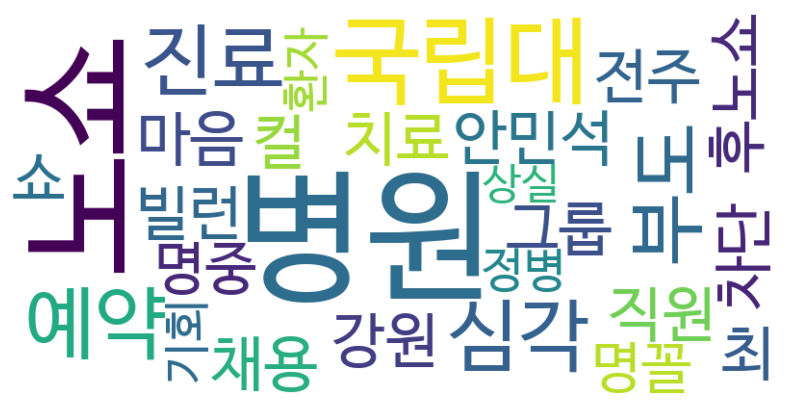

In [90]:
import pandas as pd
from konlpy.tag import Okt
from nltk import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assume 'df' is your DataFrame with the 'title' field
# If you don't have it already, you can load your DataFrame as mentioned in previous examples

# Function to extract nouns using Okt
def extract_nouns(text):
    okt = Okt()
    nouns = okt.nouns(text)
    return nouns

# Apply the function to the 'title' field
df['nouns'] = df['title'].apply(extract_nouns)

# Flatten the list of lists
all_nouns = [noun for sublist in df['nouns'] for noun in sublist]
noun_counter=Counter(all_nouns)
print(noun_counter)


# Calculate word frequencies
freq_dist = FreqDist(all_nouns)

# Display the top 10 most common words
print("Top 10 most common words:")
print(freq_dist.most_common(10))

# Visualize a word cloud
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [76]:
df.to_csv('병원노쇼df.csv',index=False,encoding='utf-8')

<BarContainer object of 27 artists>

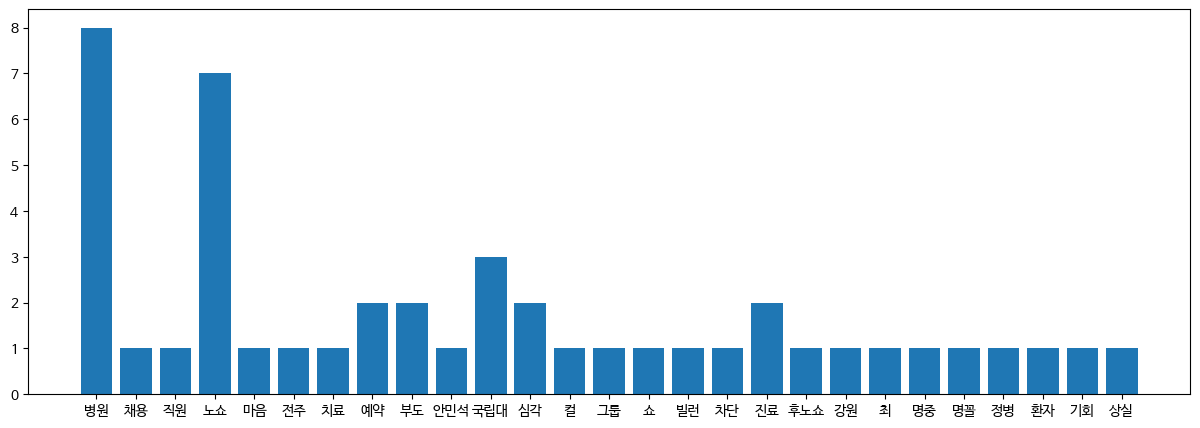

In [89]:
plt.figure(figsize=(15, 5))
plt.bar(noun_counter.keys(),noun_counter.values())